# <center>Cartpole.</center>

![space invaders poster image](https://gym.openai.com/videos/2019-05-31--eRh4Fbp8G5/CartPole-v1/poster.jpg)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11883217662913463801
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3257991168
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3909886577189552128
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import gym
import numpy as np
from dqn.model import ModelVanilla
from dqn.train import Train 
from dqn.dqnAgent import DQNAgent
import matplotlib.pyplot as plt

from gym.wrappers.atari_preprocessing import AtariPreprocessing
from baselines.common.atari_wrappers import NoopResetEnv, MaxAndSkipEnv, wrap_deepmind

Using TensorFlow backend.


In [3]:
env = gym.make('CartPole-v1')

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [4]:
print(env.observation_space.shape)
print(env.action_space)

(4,)
Discrete(2)


### Agent acting randomly

In [5]:
from tqdm import tqdm

reward_random = []

for i in tqdm(range(500)):
    total_reward = 0
    env.reset()
    while True:
        #env.render()
        next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
        total_reward += reward
        if done:
            reward_random.append(total_reward)
            break

    env.close()
    
print("Average score over a {} episodes: {}".format(500, np.asarray(reward_random).mean()))

100%|██████████| 500/500 [00:00<00:00, 5535.97it/s]

Average score over a 500 episodes: 21.746


### Establishing a benchmark

I'll be using two benchmarks:
* The performance of an agent without training over 100 games
* The performance of a human
    * My avg performance over 50 games: 520
    * Avg performance of profesional tester according to DeepMind's Paper: 1652

 score: 15.0: 100%|██████████| 500/500 [00:00<00:00, 864.08it/s]


Average score: 22.98


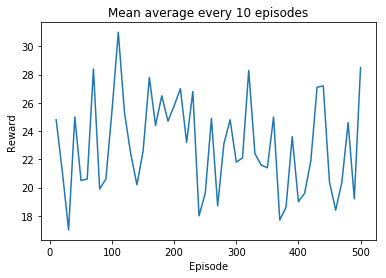

In [7]:
episodes_eval = 500
agent_bench = DQNAgent(action_size=2)
benchmark = Train(env, agent_bench)

# Evaluate performance
benchmark.train(episodes_eval, learn=False, render=False)

# Plot rewards
benchmark.plot_rewards()

## Training

 score: 189.0: 100%|██████████| 20000/20000 [1:12:42<00:00,  4.60it/s]   


Average score: 167.17915


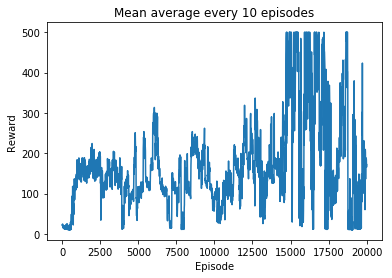

Average score: 167.17915


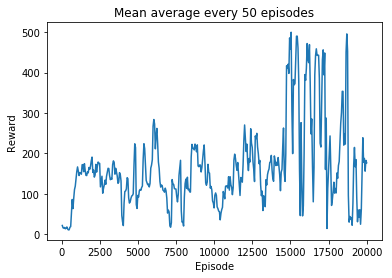

Average score: 167.17915


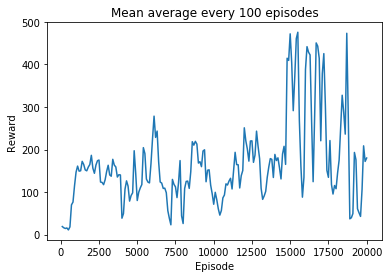

In [8]:
episodes_train = 20000
agent_train = DQNAgent(dueling=False, action_size=2)
# Load existing saved weights
# Comment if don't want to load pre-trained weights
#agent_train.load_weights('best_model_dueling')

train = Train(env, agent_train)
# Train the agent
train.train(episodes_train, learn=True, render=False)

# Plot rewards
train.plot_rewards(mean_avg=10)
train.plot_rewards(mean_avg=50)
train.plot_rewards(mean_avg=100)

In [ ]:
evaluation = Train(env, agent_train)

# Evaluate performance
evaluation.train(episodes_eval, learn=False, render=True, monitor=True)

# Plot rewards
evaluation.plot_rewards(mean_avg=10)

 score: 200.0:  48%|████▊     | 238/500 [01:06<01:10,  3.70it/s]